# NVDA
Nvidia Corporation (NVDA) is a leading American technology company known for its graphics processing units (GPUs) and artificial intelligence (AI) solutions. 

Founded in 1993, Nvidia has become a key player in the gaming, data center, and automotive industries. The company's GPUs are widely used in gaming consoles, high-performance computing, and AI applications.

## Settings

In [2]:
# Root Settings
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path().resolve().parent))

# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance import (
    get_facts,
    annual_net_income, plot_annual_net_income, plot_net_income_growth,
    annual_dividends, plot_annual_dividends, plot_dividends_growth,
    historical_price
)

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [3]:
ticker = 'NVDA'
facts = get_facts(ticker=ticker)

## Income

The net income of Nvidia has skyrocketed in recent years, driven by the increasing demand for GPUs in gaming, AI, and data centers. The company's strong financial performance, including revenue growth and profitability, has attracted significant investor interest.

In [4]:
df_net_income = annual_net_income(facts)
df_net_income[0].tail(5)

,date,net_income,year
13,2021-01-31,4332000000,2021
14,2022-01-30,9752000000,2022
15,2023-01-29,4368000000,2023
16,2024-01-28,29760000000,2024
17,2025-01-26,72880000000,2025


## Income Growth (%)

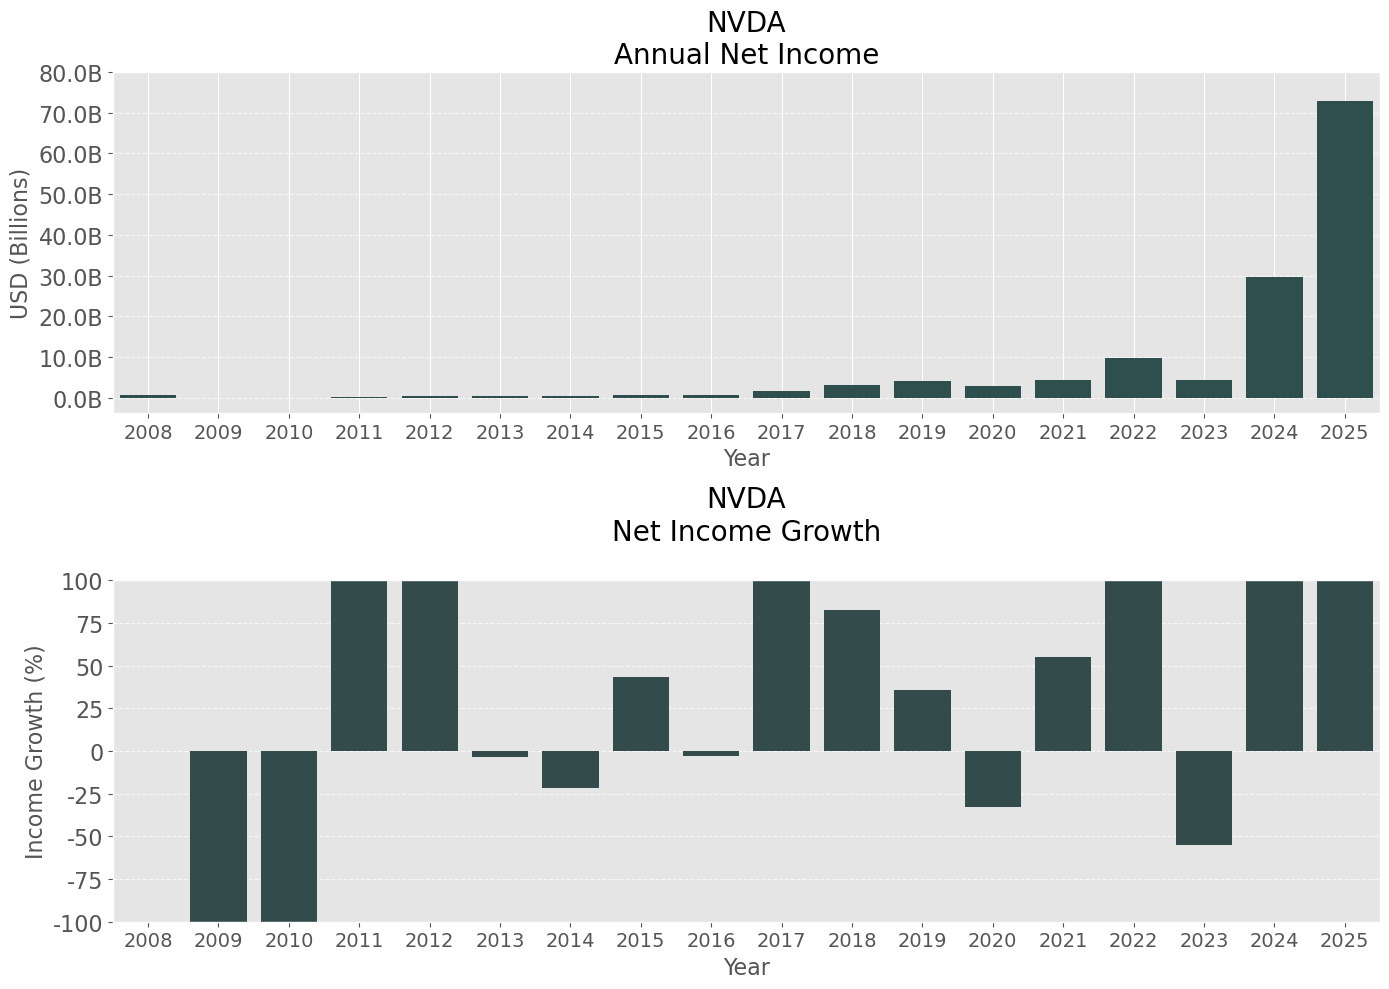

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker=ticker, unit='B', ystep=100e8, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker=ticker, ymin=-100, ymax=100, ystep=25, ax=axes[1])

# Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

## Price

The stock price also reflects Nvidia's strong performance, with significant appreciation over the years. The company's market capitalization has reached new heights, making it one of the most valuable technology companies globally.

The only question is whether the company can maintain this growth trajectory under the current macroeconomic conditions such as tarriffs.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


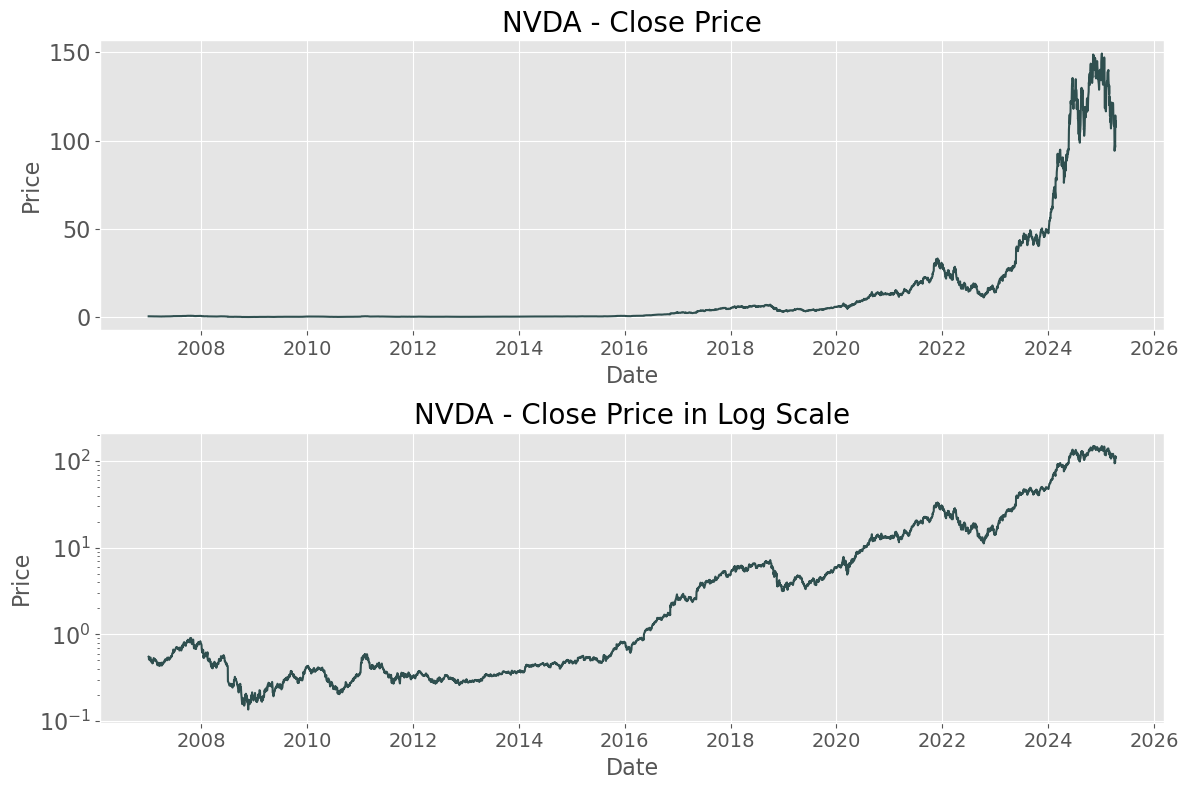

In [6]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price(ticker, start="2007", column="Close", scale='linear', ax=axes[0])
historical_price(ticker, start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()


## Dividends

> *"Do you know the only thing that gives me pleasure? It's to see my dividends coming in."*  
> 
> *John D. Rockefeller, 1901*

NVDA is not known for its dividends, but has recently started to pay a small dividend. The company has a history of reinvesting its profits into research and development, which has fueled its growth in the technology sector.

In [7]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

,date,dividends,year
10,2021-01-31,395000000,2021
11,2022-01-30,399000000,2022
12,2023-01-29,398000000,2023
13,2024-01-28,395000000,2024
14,2025-01-26,834000000,2025


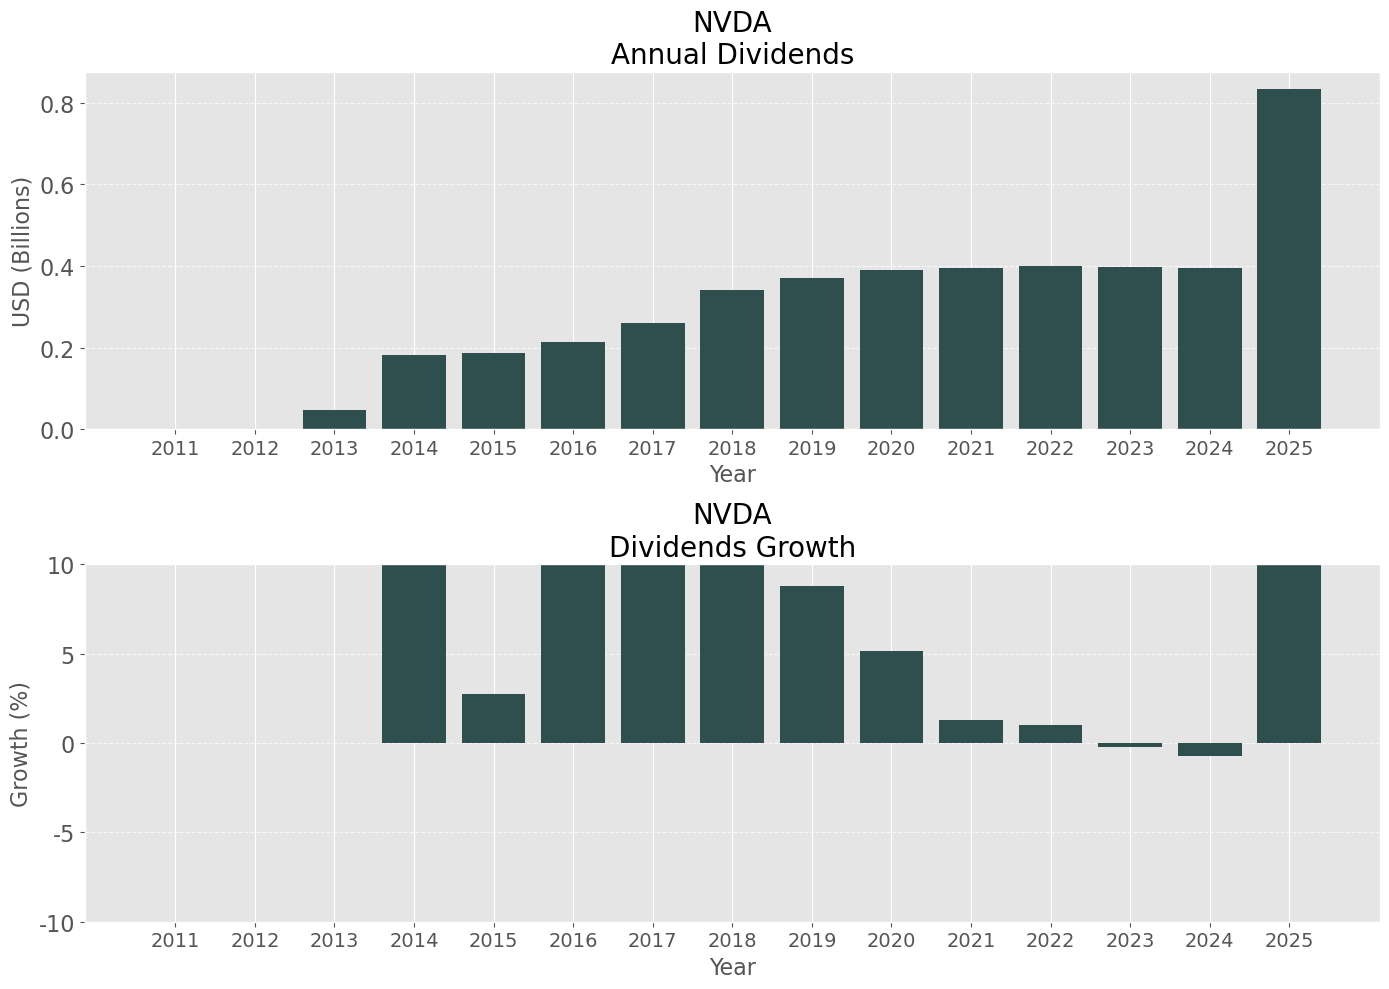

In [8]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker=ticker, unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker=ticker, ymin=-10, ymax=10, ystep=5, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

## P/E Ratio

P/E ratio of Nvidia shows some trend. It rises up as the company's stock price increases, but falls when the earning per shaer (EPS) increases. This is a sign of a healthy company, as it indicates that the market is willing to pay more for each dollar of earnings.

In [9]:
price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share
pe = (market_cap.iloc[-1] / df_net_income[0].net_income.iloc[-1]).iloc[0]

print(f"Latest P/E Ratio for {ticker}: {pe:.2f}")

[*********************100%***********************]  1 of 1 completed


Latest P/E Ratio for NVDA: 37.14


[*********************100%***********************]  1 of 1 completed


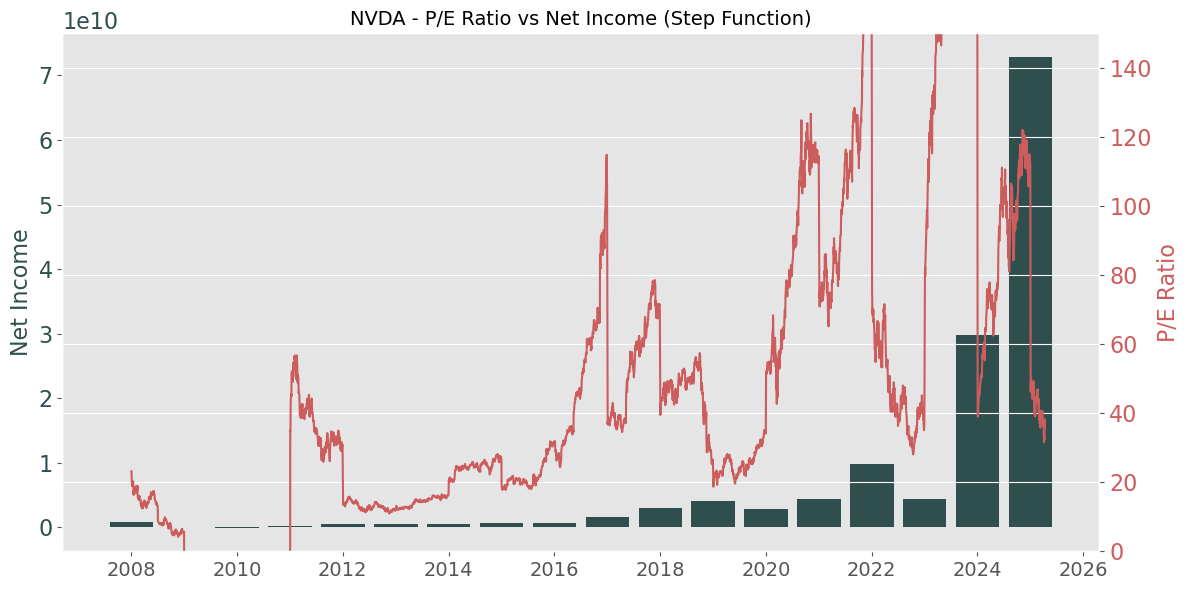

In [12]:
import yfinance as yf

price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share

df = df_net_income[0].copy()
df = df[df['year'] >= market_cap.index.min().year]
df['effective_date'] = pd.to_datetime(df['year'], format='%Y')  # Jan 1 of next year

# Daily P/E Ratio using step function for annual income
step_dates = pd.to_datetime(df['date'])
step_income = df.set_index('date')['net_income']

# Create step series aligned with price_df
pe_df = market_cap.copy()
pe_df['year'] = pe_df.index.year
pe_df['net_income'] = pe_df['year'].map(df.set_index('year')['net_income'])
pe_df['pe'] = pe_df[ticker] / pe_df['net_income']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Net Income (right y-axis)
ax1.bar(df['effective_date'], df['net_income'], width=300, color='darkslategray')
ax1.set_ylabel('Net Income', color='darkslategray')
ax1.tick_params(axis='y', labelcolor='darkslategray')
ax1.grid(False)

# P/E Ratio (left y-axis)
ax2 = ax1.twinx()
ax2.plot(pe_df.index, pe_df['pe'], color='indianred', label='P/E Ratio')
ax2.set_ylabel('P/E Ratio', color='indianred')
ax2.set_ylim(0, 150)
ax2.tick_params(axis='y', labelcolor='indianred')

# Title and x-label
plt.title(f'{ticker} - P/E Ratio vs Net Income (Step Function)', fontsize=14)
ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()

## Conclusion

**BUY (in good price)**

NVDA has shown strong growth in recent years, driven by the increasing demand for GPUs in gaming, AI, and data centers. 

There are competitors in the market, but I cannot see any product that can replace Nvidia's GPUs in the near future. This economic moat can be a weapon to overcome the concerns about the macroeconomic conditions. 

The P/E ratio shows a healthy trend, indicating that the market is willing to pay more for each dollar of earnings. 

Overall, Nvidia is a strong company with a bright future.